--- 파레토 그래프용 데이터 ---
col_0        Frequency  Cum Rel Freq
row_0                               
100.0-105.0         44          0.55
95.0-100.0          36          1.00




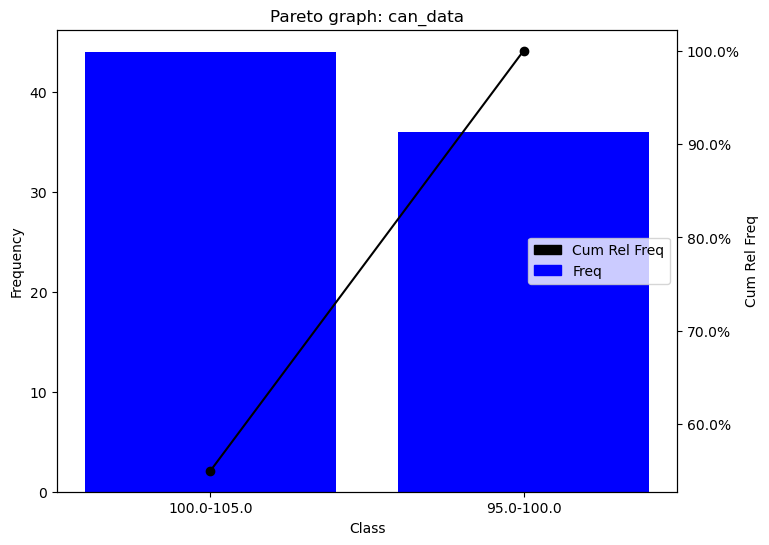

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches


can_data = np.array([
    101.8, 101.5, 102.6, 101.0, 101.8, 96.8, 102.4, 100.0, 98.8, 98.1,
    98.8, 98.0, 99.4, 95.5, 100.1, 100.5, 97.4, 100.2, 101.4, 98.7,
    101.4, 99.4, 101.7, 99.0, 99.7, 98.8, 99.5, 100.0, 99.7, 100.9,
    99.7, 99.0, 98.8, 99.7, 100.9, 99.9, 97.5, 101.5, 98.2, 99.2,
    98.6, 101.4, 102.1, 102.9, 100.8, 99.4, 103.7, 100.3, 100.2, 101.1,
    101.8, 100.0, 101.2, 100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1,
    100.1, 101.6, 99.3, 96.1, 100.0, 99.7, 99.7, 99.4, 101.5, 100.9,
    101.2, 99.9, 99.1, 100.7, 100.8, 100.8, 101.4, 100.3, 98.4, 97.2
])

bins = [95, 100, 105]
labels = ['95.0-100.0', '100.0-105.0']
can_data_categorized = pd.cut(can_data, bins=bins, labels=labels, right=False)

table1 = pd.crosstab(index=can_data_categorized, columns="Frequency", margins=True)

for i in range(len(table1) - 1):
    table1.iloc[i, 1] = table1.iloc[i, 0] / table1.iloc[-1, 0]
table1.rename(columns={'All': 'Relative Freq'}, inplace=True)

table4graph = pd.crosstab(index=can_data_categorized, columns="Frequency", margins=False)

df_sorted = table4graph.sort_values(by='Frequency', ascending=False)

df_sorted['Cum Rel Freq'] = (df_sorted['Frequency'].cumsum() / df_sorted['Frequency'].sum())



fig, ax1 = plt.subplots(figsize=(8, 6))
#bar graph
ax1.bar(df_sorted.index, df_sorted['Frequency'], color="blue")
ax1.set_xlabel('Class')
ax1.set_ylabel('Frequency')
#plot graph
ax2 = ax1.twinx()
ax2.plot(df_sorted.index, df_sorted['Cum Rel Freq'], color="black", marker="o")
ax2.set_ylabel('Cum Rel Freq')
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))

p_legend1 = mpatches.Patch(color="black", label="Cum Rel Freq")
p_legend2 = mpatches.Patch(color="blue", label="Freq")
plt.legend(handles=[p_legend1, p_legend2], loc="center right")

plt.title("Pareto graph: can_data")
plt.show()